In [23]:
# import classic library
import pandas as pd
import numpy as np
# import library to draw gaphics
import matplotlib.pyplot as plt

# import modeling library
from sklearn.datasets import load_iris, make_blobs # Iris data
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Example of Logistic Regression

Here, we use logistic regression to understand how it works. As our goal is just to use logistic regression, we use a simple example. This example is from scikit-learn documentation. Voir le lien suivant : [LogisticRegressionScikitLearn](https://scikit-learn.org/1.5/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py)

In [18]:
# import data iris to study
iris = load_iris()
# Créer un DataFrame pandas à partir des données et des noms des colonnes
data_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names) # features
data_iris["target"] = iris.target

In [19]:
# split dataframe into two parts
X = data_iris.drop(['target'], axis=1)# feature
y = data_iris['target'] # target

In [20]:
# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, y)

LogisticRegression(C=100000.0)

# Classifying logistic regression into three class thanks to Logistic Regression

This part of study explains how to use Logistic Regression for multi-class, to visualize boundary decision and to understand difference between "multinomial" and "OvR" approach. This code is come from the documentation of scikit-learn [Plot-multinomial-and-One-vs-Rest-Logistic-Regression](https://scikit-learn.org/1.5/auto_examples/linear_model/plot_logistic_multinomial.html#sphx-glr-auto-examples-linear-model-plot-logistic-multinomial-py)

We just comment this beautiful code to understand what authors (Tom Dupre la Tour) did it.

In [29]:
# 1st step : create three class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]] # create three points center
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40) # create 1000 points around each centers
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation) # transform X into matrix with 2 columns

training score : 0.995 (multinomial)
training score : 0.976 (ovr)


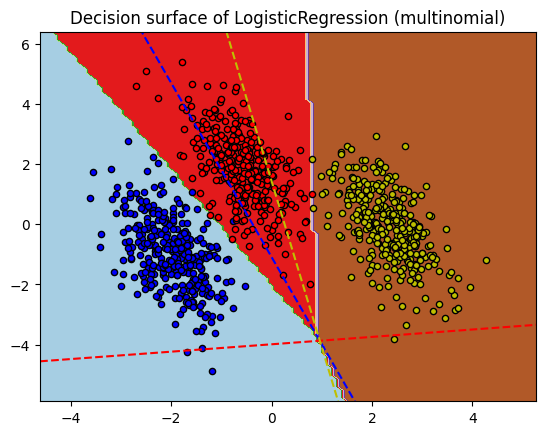

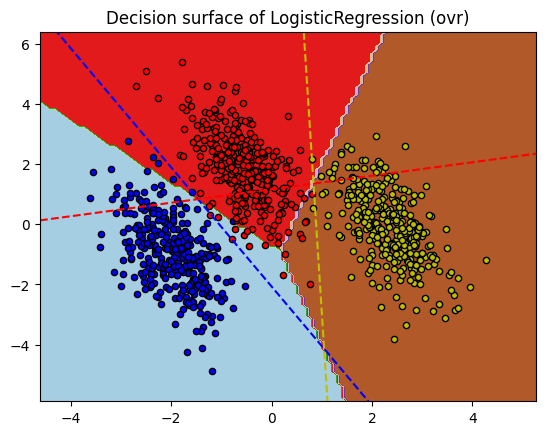

In [30]:
for multi_class in ("multinomial", "ovr"):
    # create a logistic regression with solver "sag" for optimization
    clf = LogisticRegression(solver="sag", max_iter=100, random_state=42)
    if multi_class == "ovr":
        # create an independent model for each class
        clf = OneVsRestClassifier(clf)
    # train model with the dataset
    clf.fit(X, y)

    # print the training scores
    print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))

    _, ax = plt.subplots()
    # draw doundary decision computing by classifier on the set of X and distribute points with color to show their
    DecisionBoundaryDisplay.from_estimator(
        clf, X, response_method="predict", cmap=plt.cm.Paired, ax=ax
    )
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis("tight")

    # Plot also the training points
    colors = "bry"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, edgecolor="black", s=20)

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    if multi_class == "ovr":
        coef = np.concatenate([est.coef_ for est in clf.estimators_])
        intercept = np.concatenate([est.intercept_ for est in clf.estimators_])
    else:
        coef = clf.coef_
        intercept = clf.intercept_
    # Add hyperplan
    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

        plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

plt.show()